# Projekt 2 z przedmiotu "**Uczenie Maszynowe**"
---

- **autor:** Adrian Nafalski
- **nr_indeksu:** 303831

---

# Import potrzebnych bibliotek

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split
from sklearn.impute import IterativeImputer, SimpleImputer

# Odczyt i analiza danych

In [2]:
titanic_data = pd.read_csv("http://analityk.edu.pl/wp-content/uploads/2020/02/titanic.csv")
titanic_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
titanic_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home_dest'],
      dtype='object')

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
titanic_data.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [6]:
print("Brakujące wartości:")
titanic_data.isnull().sum()

Brakujące wartości:


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home_dest     564
dtype: int64

In [7]:
print("Unikalne wartości w kolumnie 'Pclass':")
titanic_data['pclass'].unique()

Unikalne wartości w kolumnie 'Pclass':


array([1, 2, 3])

In [8]:
print("Unikalne wartości w kolumnie 'Sex':")
titanic_data['sex'].unique()

Unikalne wartości w kolumnie 'Sex':


array(['female', 'male'], dtype=object)

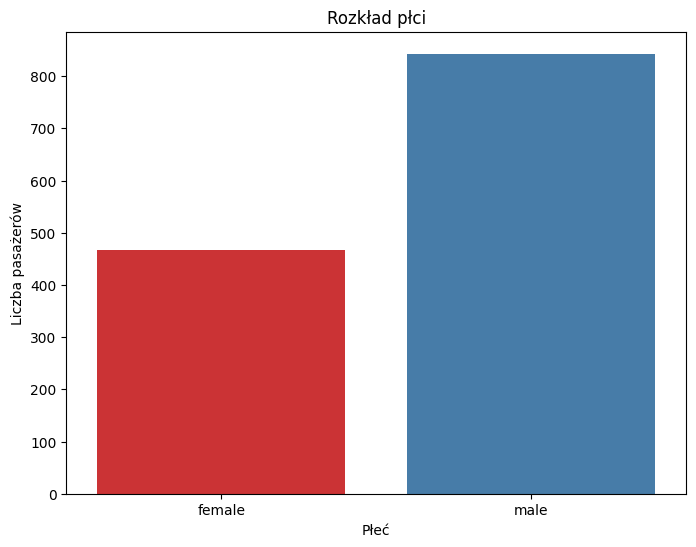

In [9]:
# Stworzenie wykresu dla rozkładu płci
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=titanic_data, hue='sex', palette='Set1', legend=False)
plt.title('Rozkład płci')
plt.xlabel('Płeć')
plt.ylabel('Liczba pasażerów')
plt.show()

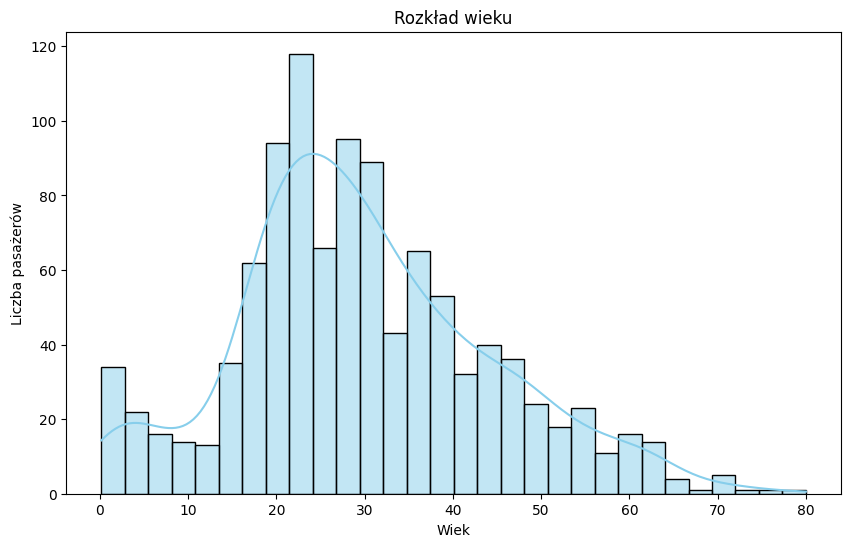

In [10]:
# Stworzenie wykresu dla rozkładu wieku
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Rozkład wieku')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')
plt.show()

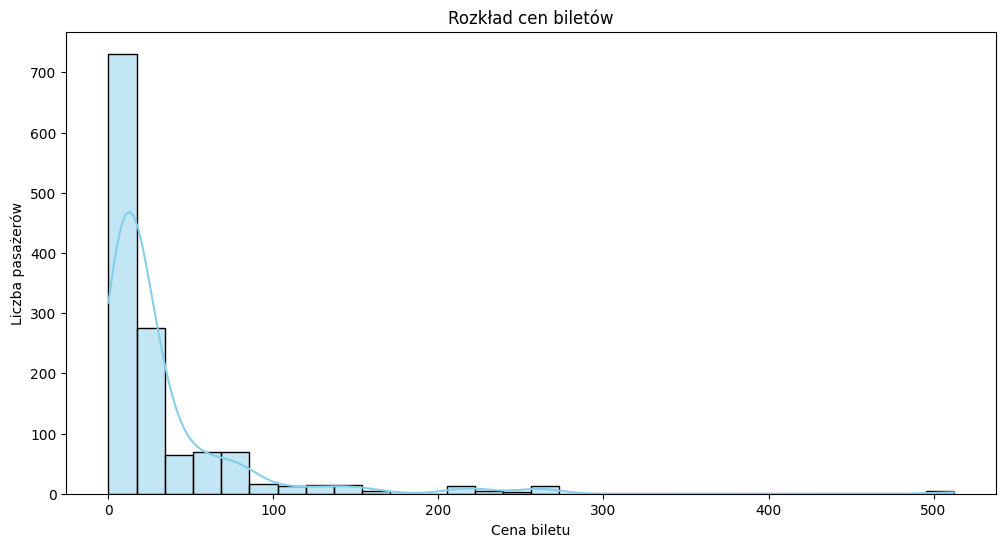

In [11]:
# Stworzenie wykresu dla cen biletów
plt.figure(figsize=(12, 6))
sns.histplot(titanic_data['fare'], bins=30, kde=True, color='skyblue')
plt.title('Rozkład cen biletów')
plt.xlabel('Cena biletu')
plt.ylabel('Liczba pasażerów')
plt.show()

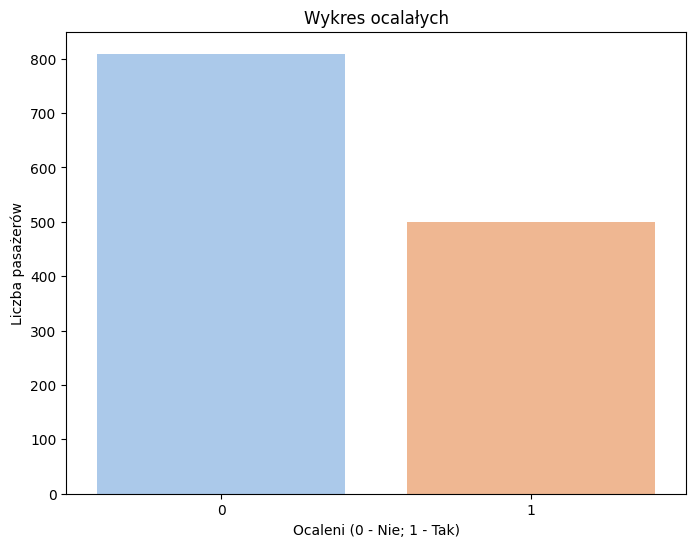

In [12]:
# Stworzenie wykresu dla ocalałych
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=titanic_data, hue='survived', palette='pastel', legend=False)
plt.title('Wykres ocalałych')
plt.xlabel('Ocaleni (0 - Nie; 1 - Tak)')
plt.ylabel('Liczba pasażerów')
plt.show()

# Feature Engineering

In [13]:
# Definiuje funkcję do kategorii wiekowej
def age_range_category(age):
    if age <= 6:
        return 'Bobas'
    elif age <= 12:
        return 'Dzieciak'
    elif age <= 18:
        return 'Nastolatek'
    else:
        return 'Dorosły'

In [14]:
# Uzupełnianiam brakujące wartości w kolumnie 'age' na podstawie podanych warunków
conditions = [
    (titanic_data['name'] == 'Miss') & (titanic_data['parch'] == 0),
    (titanic_data['name'] == 'Master'),
    (titanic_data['name'].isin(['Sir', 'Mr', 'Ms', 'Mrs'])),
    (titanic_data['name'] == 'Dr')
]

values = [
    titanic_data.query("(name == 'Miss') & (parch == 0)")['age'].mean(),
    titanic_data.query("name == 'Master'")['age'].mean(),
    titanic_data.query("name in ['Sir', 'Mr', 'Ms', 'Mrs']")['age'].mean(),
    titanic_data.query("name == 'Dr'")['age'].mean()
]

In [15]:
titanic_data['age'] = titanic_data['age'].fillna(pd.Series(np.select(conditions, values, default=None)))
titanic_data['age'] = titanic_data['age'].fillna(titanic_data.groupby('sex')['age'].transform('mean'))

In [16]:
# Tworzę trzy dodatkowe zmienne
titanic_data['family_size'] = titanic_data['parch'] + titanic_data['sibsp'] + 1
titanic_data['age_range'] = titanic_data['age'].apply(age_range_category)
titanic_data['mpc'] = titanic_data['age'] * titanic_data['pclass']

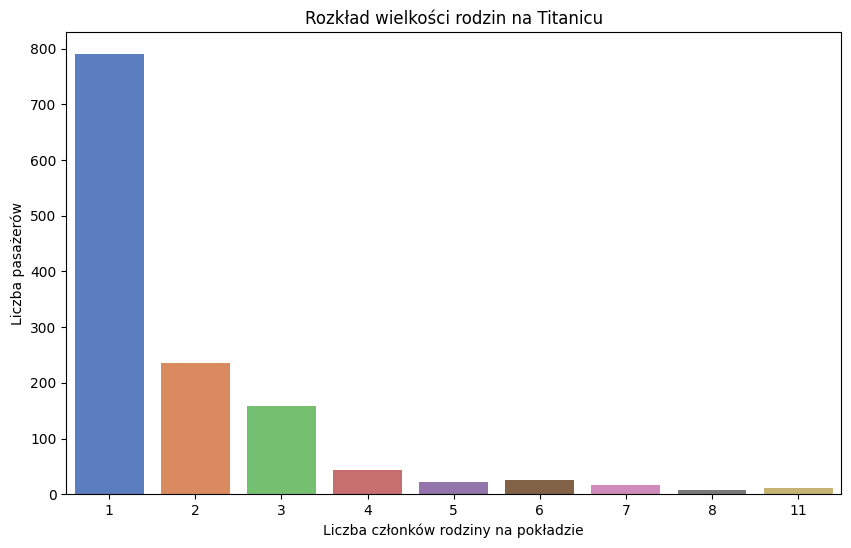

In [17]:
# Stworzenie wykresu dla rozkładu liczby dzieci i rodziców
plt.figure(figsize=(10, 6))
sns.countplot(x='family_size', data=titanic_data, palette='muted', hue='family_size', legend=False)
plt.title('Rozkład wielkości rodzin na Titanicu')
plt.xlabel('Liczba członków rodziny na pokładzie')
plt.ylabel('Liczba pasażerów')
plt.show()

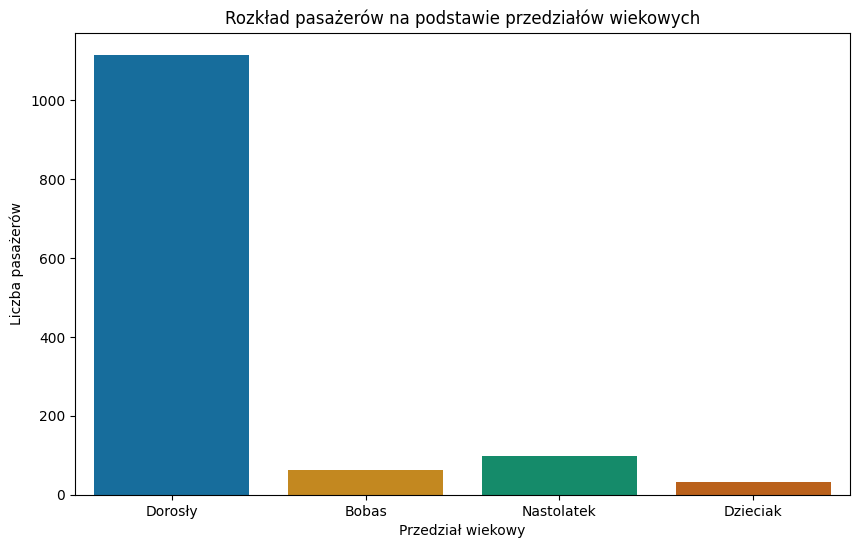

In [18]:
# Stworzenie wykresu dla rozkładu przedziałów wiekowych
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', data=titanic_data, palette='colorblind', hue='age_range', legend=False)
plt.title('Rozkład pasażerów na podstawie przedziałów wiekowych')
plt.xlabel('Przedział wiekowy')
plt.ylabel('Liczba pasażerów')
plt.show()

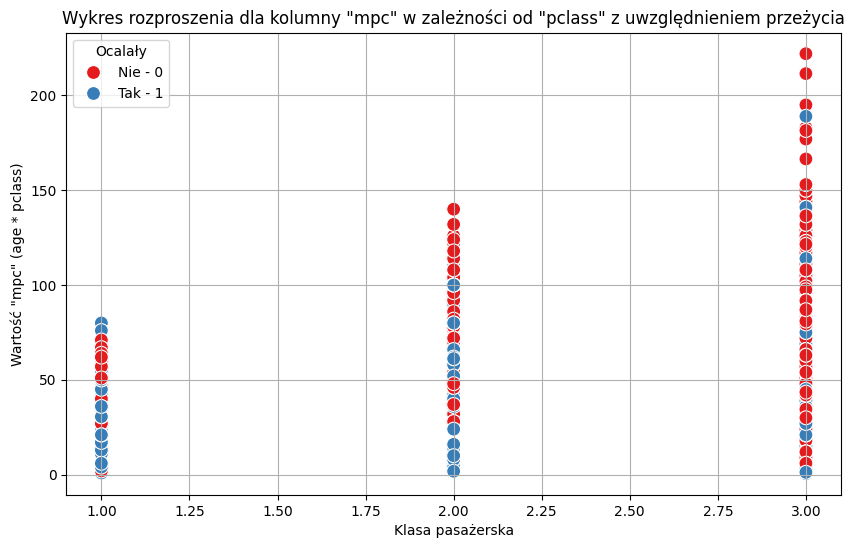

In [19]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='pclass', y='mpc', data=titanic_data, hue='survived', palette='Set1', s=100)
plt.title('Wykres rozproszenia dla kolumny "mpc" w zależności od "pclass" z uwzględnieniem przeżycia')
plt.xlabel('Klasa pasażerska')
plt.ylabel('Wartość "mpc" (age * pclass)')
plt.legend(title='Ocalały', labels=['Nie - 0', 'Tak - 1'])
handles, labels = scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles=handles, title='Ocalały', labels=['Nie - 0', 'Tak - 1'])
plt.grid(True)
plt.show()

In [20]:
# Wybór istotnych atrybutów
selected_features = ['sex', 'age', 'age_range', 'pclass', 'fare', 'family_size', 'mpc', 'sibsp', 'survived', 'embarked']
titanic_data = titanic_data[selected_features]

In [21]:
titanic_data.dtypes

sex             object
age            float64
age_range       object
pclass           int64
fare           float64
family_size      int64
mpc            float64
sibsp            int64
survived         int64
embarked        object
dtype: object

In [22]:
# Konwersja zmiennych do odpowiednich typów danych
titanic_data = titanic_data.copy()
titanic_data['survived'] = titanic_data['survived'].astype('category')
titanic_data['pclass'] = titanic_data['pclass'].astype('category')
titanic_data['embarked'] = titanic_data['embarked'].astype('category')
titanic_data['sex'] = titanic_data['sex'].astype('category')
titanic_data['fare'] = titanic_data['fare'].astype(float)

In [23]:
titanic_data.dtypes

sex            category
age             float64
age_range        object
pclass         category
fare            float64
family_size       int64
mpc             float64
sibsp             int64
survived       category
embarked       category
dtype: object

In [24]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          1309 non-null   category
 1   age          1309 non-null   float64 
 2   age_range    1309 non-null   object  
 3   pclass       1309 non-null   category
 4   fare         1308 non-null   float64 
 5   family_size  1309 non-null   int64   
 6   mpc          1309 non-null   float64 
 7   sibsp        1309 non-null   int64   
 8   survived     1309 non-null   category
 9   embarked     1307 non-null   category
dtypes: category(4), float64(3), int64(2), object(1)
memory usage: 67.1+ KB


In [25]:
titanic_data['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [26]:
titanic_data

,sex,age,age_range,pclass,fare,family_size,mpc,sibsp,survived,embarked
0,female,29.000000,Dorosły,1,211.3375,1,29.000000,0,1,S
1,male,0.916700,Bobas,1,151.5500,4,0.916700,1,1,S
2,female,2.000000,Bobas,1,151.5500,4,2.000000,1,0,S
3,male,30.000000,Dorosły,1,151.5500,4,30.000000,1,0,S
4,female,25.000000,Dorosły,1,151.5500,4,25.000000,1,0,S
...,...,...,...,...,...,...,...,...,...,...
1304,female,14.500000,Nastolatek,3,14.4542,2,43.500000,1,0,C
1305,female,28.687071,Dorosły,3,14.4542,2,86.061212,1,0,C
1306,male,26.500000,Dorosły,3,7.2250,1,79.500000,0,0,C
1307,male,27.000000,Dorosły,3,7.2250,1,81.000000,0,0,C


In [27]:
# Analiza korelacji między zmiennymi
correlation_matrix = titanic_data.corr(numeric_only=True)

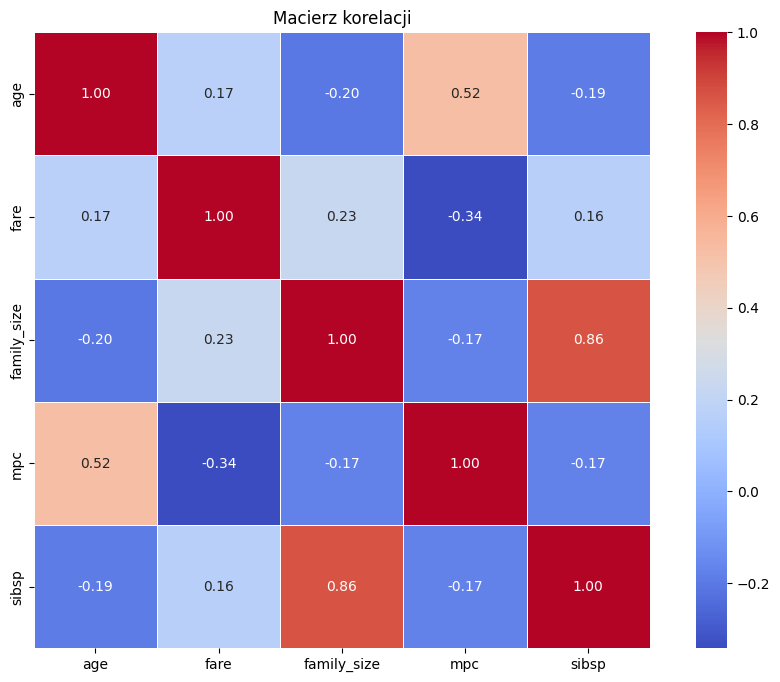

In [28]:
# Wykres korelacji między zmiennymi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, square=True)
plt.title('Macierz korelacji')
plt.show()

# Uzupełnienie brakujących danych

In [29]:
# Sprawdzenie brakujących danych
round(titanic_data.isna().sum() / len(titanic_data), 3)

sex            0.000
age            0.000
age_range      0.000
pclass         0.000
fare           0.001
family_size    0.000
mpc            0.000
sibsp          0.000
survived       0.000
embarked       0.002
dtype: float64

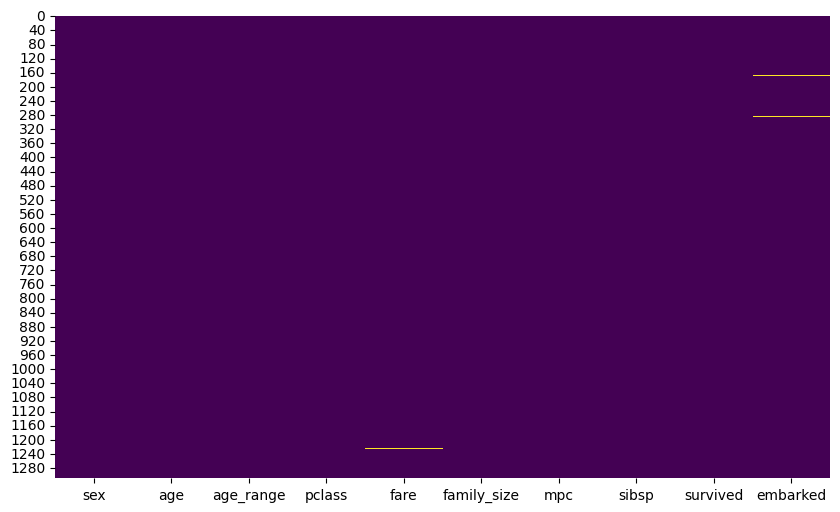

In [30]:
# Wizualizacja rozkładu brakujących danych
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [31]:
# Stworzenie kopii danych z wybranymi atrybutami
selected_data = titanic_data[selected_features]

# Uzupełnienie brakujących wartości tylko dla 'mpc' i 'fare' za pomocą IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
selected_data_imputed = imputer.fit_transform(selected_data[['mpc', 'fare']])

# Zastąpienie danych z imputacji w oryginalnych danych
titanic_data[['mpc', 'fare']] = selected_data_imputed

In [32]:
# Uzupełnienie brakujących wartości dla 'embarked' za pomocą SimpleImputer
imputer_embarked = SimpleImputer(strategy='most_frequent')
titanic_data['embarked'] = imputer_embarked.fit_transform(titanic_data[['embarked']])

In [33]:
# Sprawdzenie brakujących danych
round(titanic_data.isna().sum() / len(titanic_data), 3)

sex            0.0
age            0.0
age_range      0.0
pclass         0.0
fare           0.0
family_size    0.0
mpc            0.0
sibsp          0.0
survived       0.0
embarked       0.0
dtype: float64

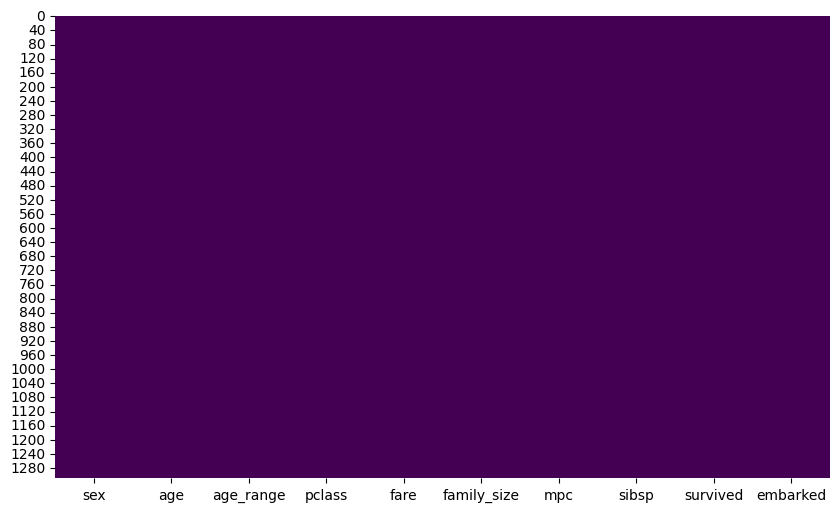

In [34]:
# Wizualizacja rozkładu brakujących danych
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.show()

# Przycięcie odstających wartości

In [35]:
# Wybór interesujących atrybutów
selected_features = ['age', 'fare']

In [36]:
# Stworzenie kopii danych z wybranymi atrybutami
selected_data = titanic_data[selected_features]

In [37]:
# Przycięcie odstających wartości dla 'age'
age_threshold = 67
titanic_data.loc[titanic_data['age'] > age_threshold, 'age'] = age_threshold

In [38]:
# Przycięcie odstających wartości dla 'fare'
fare_threshold = titanic_data['fare'].mean() + 3 * titanic_data['fare'].std()
titanic_data.loc[titanic_data['fare'] > fare_threshold, 'fare'] = fare_threshold

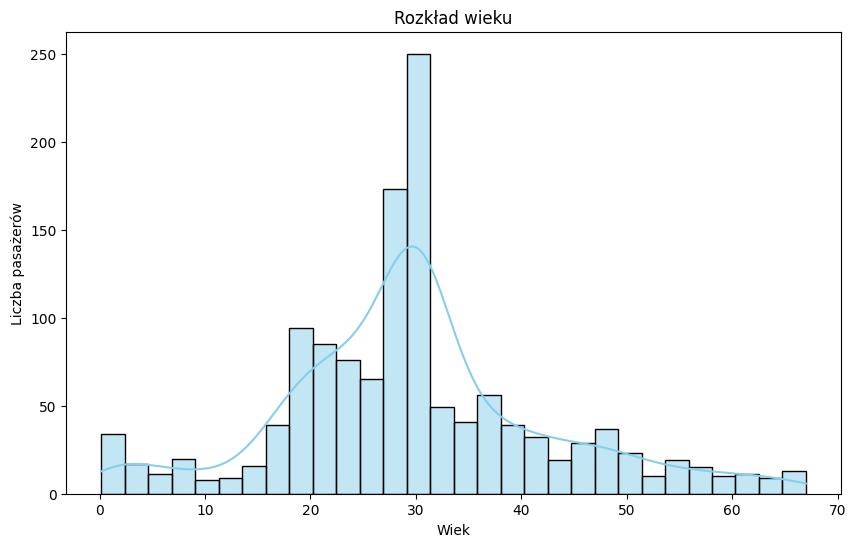

In [39]:
# Stworzenie wykresu dla rozkładu wieku
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Rozkład wieku')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')
plt.show()

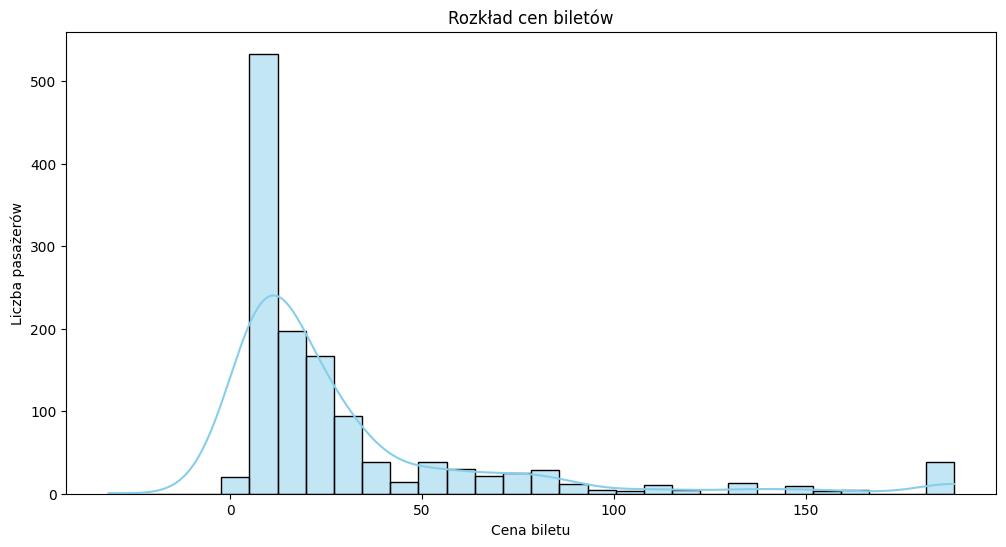

In [40]:
# Stworzenie histogramu dla cen biletów
plt.figure(figsize=(12, 6))
sns.histplot(titanic_data['fare'], bins=30, kde=True, color='skyblue')
plt.title('Rozkład cen biletów')
plt.xlabel('Cena biletu')
plt.ylabel('Liczba pasażerów')
plt.show()

In [41]:
# Lista kolumn do obsługi wartości odstających
outlier_columns = ['sibsp', 'family_size']

# Kwantyle
quantile_low = 0.1
quantile_high = 0.9

# Obsługa wartości odstających dla każdej z kolumn
for col in outlier_columns:
    qa = titanic_data[col].quantile(quantile_low)
    qb = titanic_data[col].quantile(quantile_high)
    titanic_data = titanic_data[(titanic_data[col] >= qa) & (titanic_data[col] <= qb)]

# Normalizacja danych numerycznych

In [42]:
le = LabelEncoder()
titanic_data['sex'] = le.fit_transform(titanic_data['sex'])
titanic_data['age_range'] = le.fit_transform(titanic_data['age_range'])
titanic_data['pclass'] = le.fit_transform(titanic_data['pclass'])
titanic_data['mpc'] = le.fit_transform(titanic_data['mpc'])
titanic_data['embarked'] = le.fit_transform(titanic_data['embarked'])

In [43]:
# Wybór atrybutów i zmiennej celu
features = titanic_data[['sex', 'age', 'age_range', 'pclass', 'fare', 'family_size', 'mpc', 'sibsp', 'embarked']]
target = titanic_data['survived']

In [44]:
# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)

In [45]:
# Wyodrębnienie zmiennych numerycznych
numeric_features = ['sex', 'age', 'age_range', 'pclass', 'fare', 'family_size', 'mpc', 'sibsp', 'embarked']

In [46]:
# Standaryzacja danych numerycznych za pomocą MinMaxScaler
scaler = MinMaxScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Wybór algorytmu

# Regresja Logistyczna

In [47]:
# Regresja Logistyczna
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
y_scores_logistic = logistic_model.predict_proba(X_test)[:, 1]

In [48]:
# Ocena modelu regresji logistycznej
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

Regresja Logistyczna:
Dokładność: 0.8318965517241379
Macierz Pomyłek:
[[135  17]
 [ 22  58]]
Raport Klasyfikacji:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       152
           1       0.77      0.72      0.75        80

    accuracy                           0.83       232
   macro avg       0.82      0.81      0.81       232
weighted avg       0.83      0.83      0.83       232



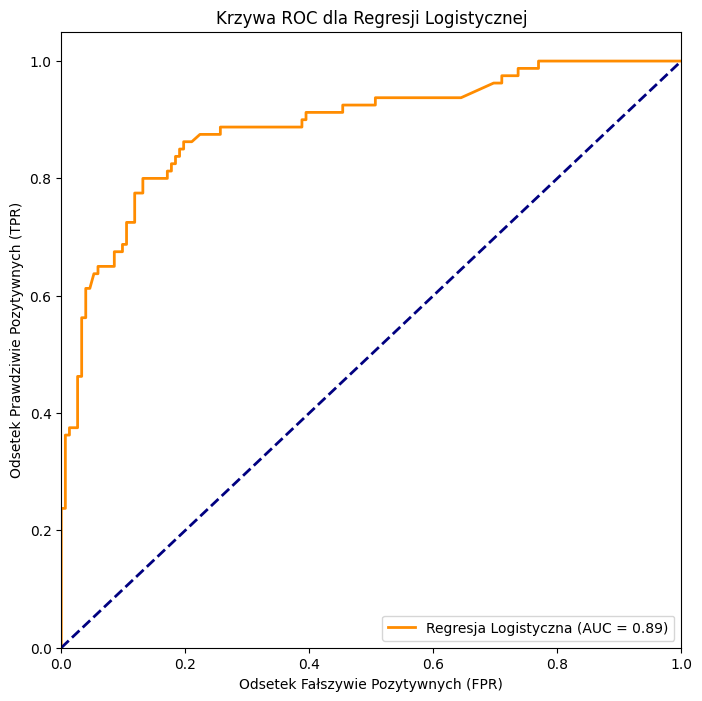

In [49]:
# Krzywa ROC dla regresji logistycznej
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_scores_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Wyświetlenie wyników dla regresji logistycznej
print("Regresja Logistyczna:")
print(f'Dokładność: {accuracy_logistic}')
print(f'Macierz Pomyłek:\n{conf_matrix_logistic}')
print(f'Raport Klasyfikacji:\n{classification_rep_logistic}')

plt.figure(figsize=(8, 8))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='Regresja Logistyczna (AUC = {:.2f})'.format(roc_auc_logistic))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Odsetek Fałszywie Pozytywnych (FPR)')
plt.ylabel('Odsetek Prawdziwie Pozytywnych (TPR)')
plt.title('Krzywa ROC dla Regresji Logistycznej')
plt.legend(loc="lower right")
plt.show()

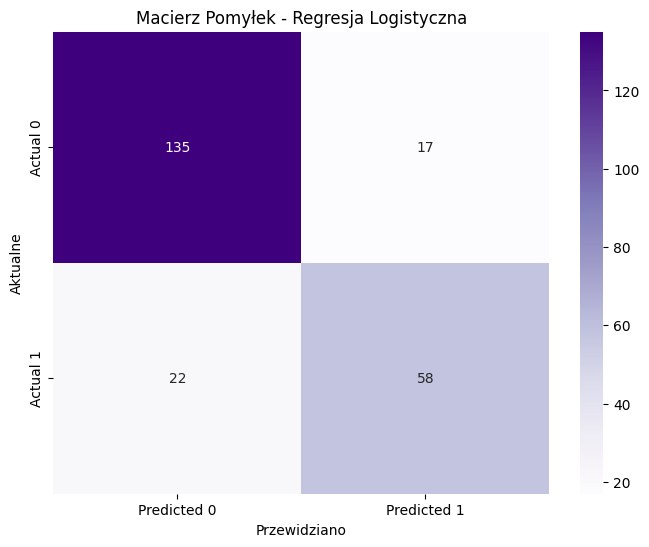

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Purples', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Przewidziano')
plt.ylabel('Aktualne')
plt.title('Macierz Pomyłek - Regresja Logistyczna')
plt.show()

# Las Losowy

In [51]:
# Las Losowy
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [52]:
# Ocena modelu Lasu Losowego
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

Las Losowy:
Dokładność: 0.8232758620689655
Macierz Pomyłek:
[[138  14]
 [ 27  53]]
Raport Klasyfikacji:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       152
           1       0.79      0.66      0.72        80

    accuracy                           0.82       232
   macro avg       0.81      0.79      0.80       232
weighted avg       0.82      0.82      0.82       232



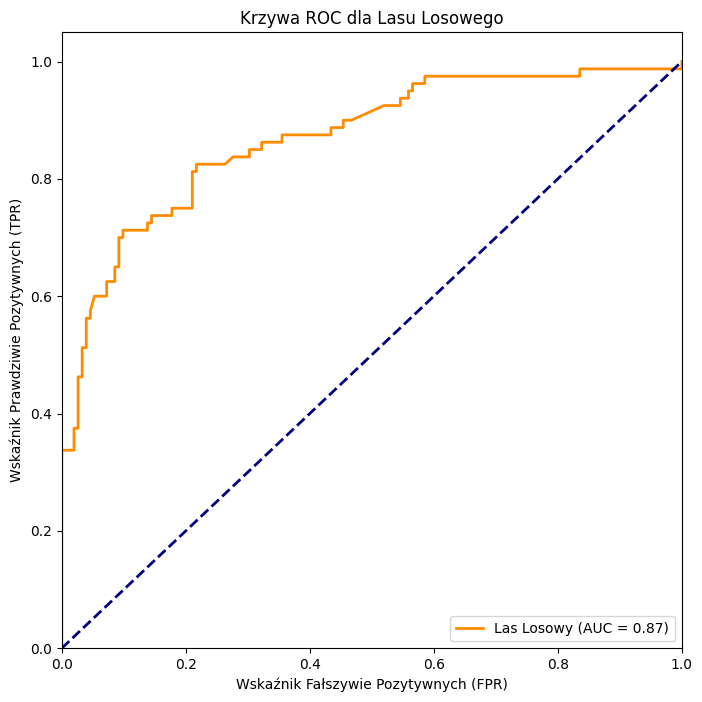

In [53]:
# Krzywa ROC dla Lasu Losowego
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Wyświetlenie wyników dla Lasu Losowego
print("Las Losowy:")
print(f'Dokładność: {accuracy_rf}')
print(f'Macierz Pomyłek:\n{conf_matrix_rf}')
print(f'Raport Klasyfikacji:\n{classification_rep_rf}')

plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Las Losowy (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Wskaźnik Fałszywie Pozytywnych (FPR)')
plt.ylabel('Wskaźnik Prawdziwie Pozytywnych (TPR)')
plt.title('Krzywa ROC dla Lasu Losowego')
plt.legend(loc="lower right")
plt.show()

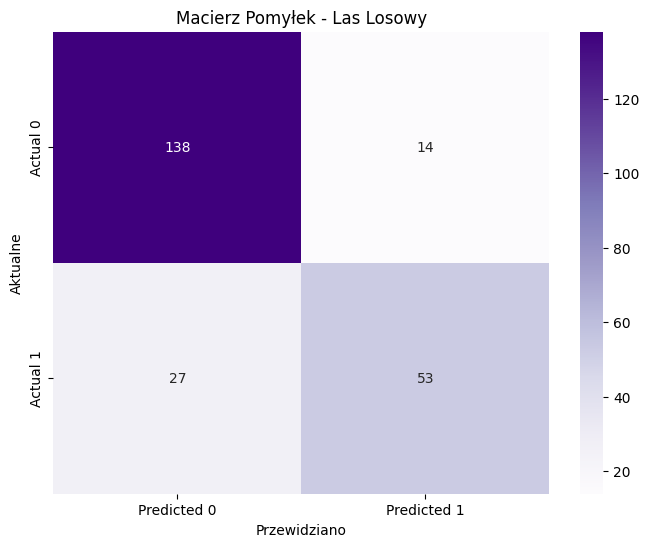

In [54]:
# Wygenerowanie heatmap dla macierzy pomyłek
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Purples', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Przewidziano')
plt.ylabel('Aktualne')
plt.title('Macierz Pomyłek - Las Losowy')
plt.show()

# Drzewo Decyzyjne

In [55]:
# Drzewo Decyzyjne
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [56]:
# Ocena modelu Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

Drzewo Decyzyjne:
Dokładność: 0.8362068965517241
Macierz Pomyłek:
[[138  14]
 [ 24  56]]
Raport Klasyfikacji:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       152
           1       0.80      0.70      0.75        80

    accuracy                           0.84       232
   macro avg       0.83      0.80      0.81       232
weighted avg       0.83      0.84      0.83       232



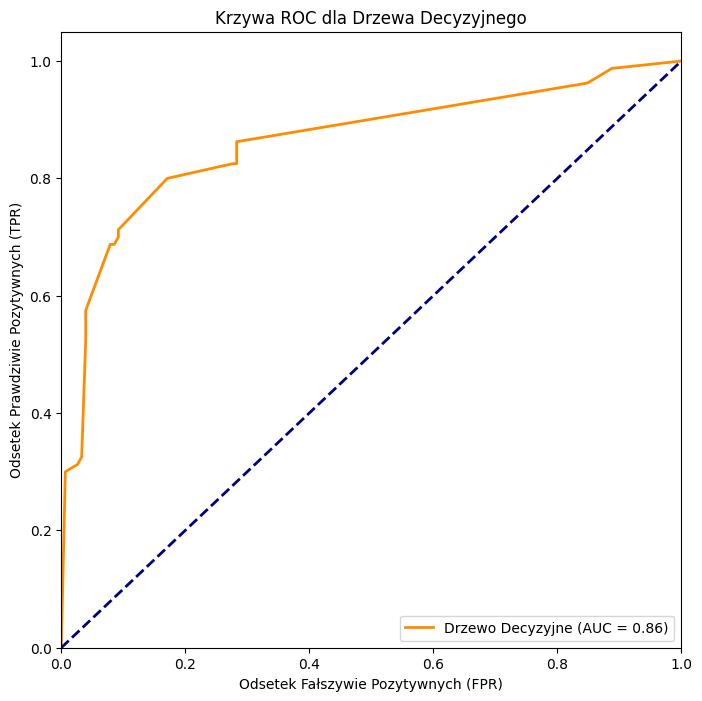

In [57]:
# Krzywa ROC dla Drzewa Decyzyjnego
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Wyświetlenie wyników dla Drzewa Decyzyjnego
print("Drzewo Decyzyjne:")
print(f'Dokładność: {accuracy_dt}')
print(f'Macierz Pomyłek:\n{conf_matrix_dt}')
print(f'Raport Klasyfikacji:\n{classification_rep_dt}')

plt.figure(figsize=(8, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Drzewo Decyzyjne (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Odsetek Fałszywie Pozytywnych (FPR)')
plt.ylabel('Odsetek Prawdziwie Pozytywnych (TPR)')
plt.title('Krzywa ROC dla Drzewa Decyzyjnego')
plt.legend(loc="lower right")
plt.show()

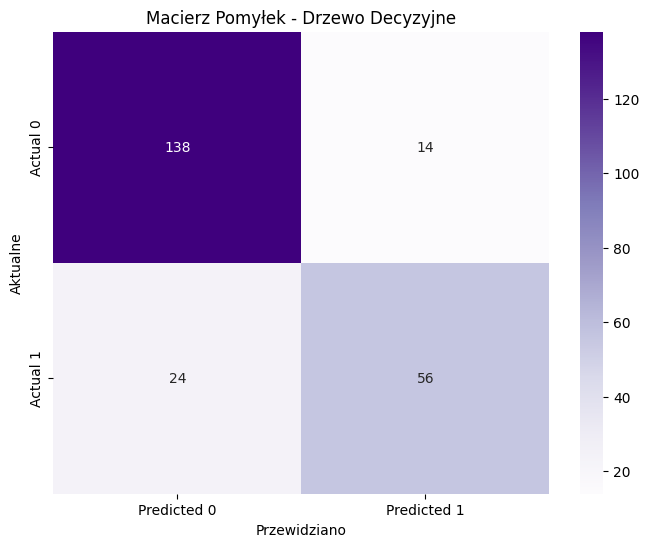

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Purples', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Przewidziano')
plt.ylabel('Aktualne')
plt.title('Macierz Pomyłek - Drzewo Decyzyjne')
plt.show()

# KNN

In [59]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [60]:
# Ocena modelu KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

KNN:
Dokładność: 0.8232758620689655
Macierz Pomyłek:
[[140  12]
 [ 29  51]]
Raport Klasyfikacji:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       152
           1       0.81      0.64      0.71        80

    accuracy                           0.82       232
   macro avg       0.82      0.78      0.79       232
weighted avg       0.82      0.82      0.82       232



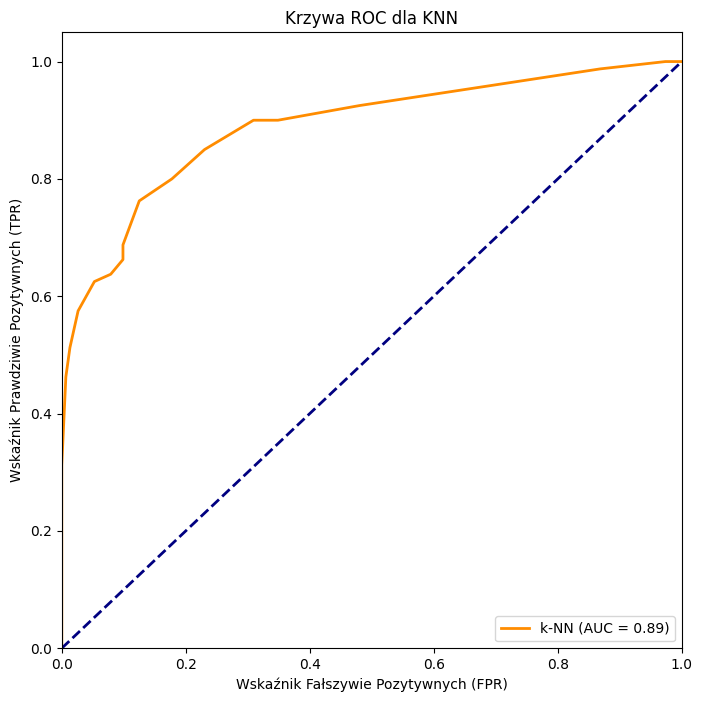

In [61]:
# Krzywa ROC dla KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Wyświetlenie wyników dla KNN
print("KNN:")
print(f'Dokładność: {accuracy_knn}')
print(f'Macierz Pomyłek:\n{conf_matrix_knn}')
print(f'Raport Klasyfikacji:\n{classification_rep_knn}')

plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='k-NN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Wskaźnik Fałszywie Pozytywnych (FPR)')
plt.ylabel('Wskaźnik Prawdziwie Pozytywnych (TPR)')
plt.title('Krzywa ROC dla KNN')
plt.legend(loc="lower right")

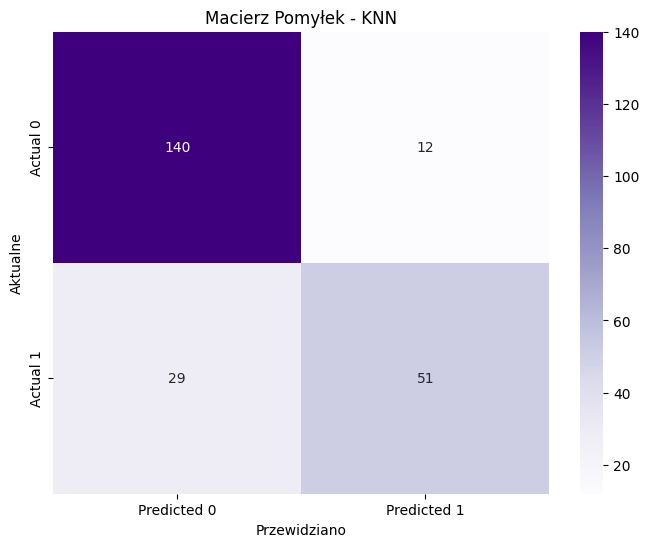

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Purples', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Przewidziano')
plt.ylabel('Aktualne')
plt.title('Macierz Pomyłek - KNN')
plt.show()

# Naive Bayes

In [63]:
# Naive Bayes
nb_model = GaussianNB(var_smoothing=3e-1)
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [64]:
# Ocena modelu Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

Naive Bayes:
Dokładność: 0.8017241379310345
Macierz Pomyłek:
[[138  14]
 [ 32  48]]
Raport Klasyfikacji:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       152
           1       0.77      0.60      0.68        80

    accuracy                           0.80       232
   macro avg       0.79      0.75      0.77       232
weighted avg       0.80      0.80      0.79       232



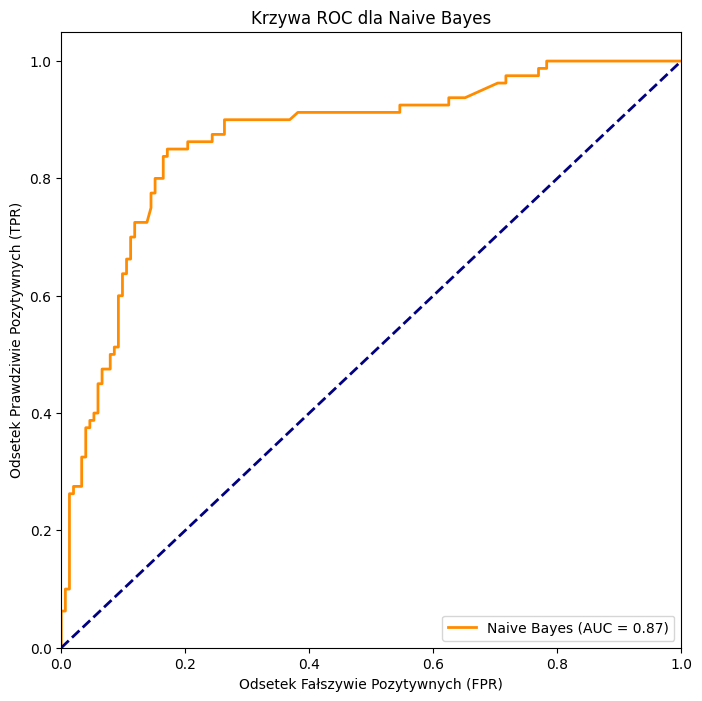

In [65]:
# Krzywa ROC dla Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Wyświetlenie wyników dla Naive Bayes
print("Naive Bayes:")
print(f'Dokładność: {accuracy_nb}')
print(f'Macierz Pomyłek:\n{conf_matrix_nb}')
print(f'Raport Klasyfikacji:\n{classification_rep_nb}')

# Wykres ROC dla Naive Bayes
plt.figure(figsize=(8, 8))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Odsetek Fałszywie Pozytywnych (FPR)')
plt.ylabel('Odsetek Prawdziwie Pozytywnych (TPR)')
plt.title('Krzywa ROC dla Naive Bayes')
plt.legend(loc="lower right")
plt.show()

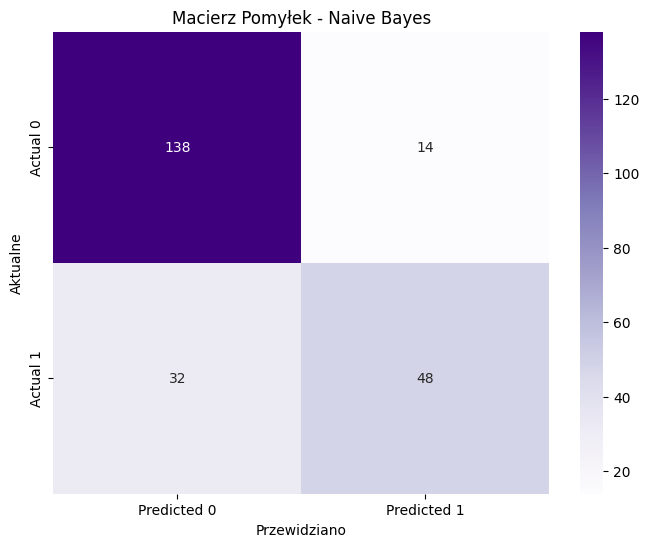

In [66]:
# Wygenerowanie heatmap dla macierzy pomyłek
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Purples', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Przewidziano')
plt.ylabel('Aktualne')
plt.title('Macierz Pomyłek - Naive Bayes')
plt.show()

# SVM

In [67]:
# Model SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [68]:
# Ocena modelu SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

SVM:
Dokładność: 0.8448275862068966
Macierz Pomyłek:
[[138  14]
 [ 22  58]]
Raport Klasyfikacji:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       152
           1       0.81      0.72      0.76        80

    accuracy                           0.84       232
   macro avg       0.83      0.82      0.82       232
weighted avg       0.84      0.84      0.84       232



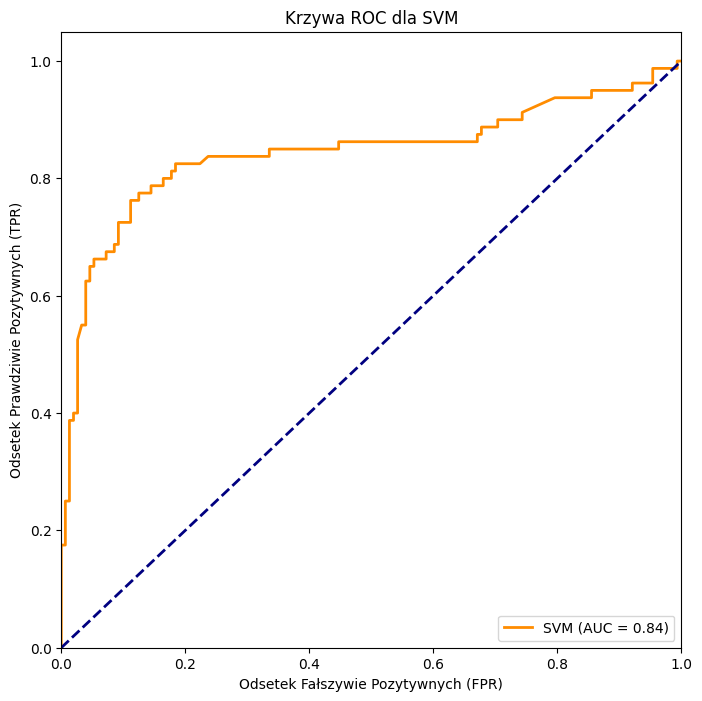

In [69]:
# Krzywa ROC dla SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Wyświetlenie wyników dla SVM
print("SVM:")
print(f'Dokładność: {accuracy_svm}')
print(f'Macierz Pomyłek:\n{conf_matrix_svm}')
print(f'Raport Klasyfikacji:\n{classification_rep_svm}')

# Wykres ROC dla SVM
plt.figure(figsize=(8, 8))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Odsetek Fałszywie Pozytywnych (FPR)')
plt.ylabel('Odsetek Prawdziwie Pozytywnych (TPR)')
plt.title('Krzywa ROC dla SVM')
plt.legend(loc="lower right")
plt.show()

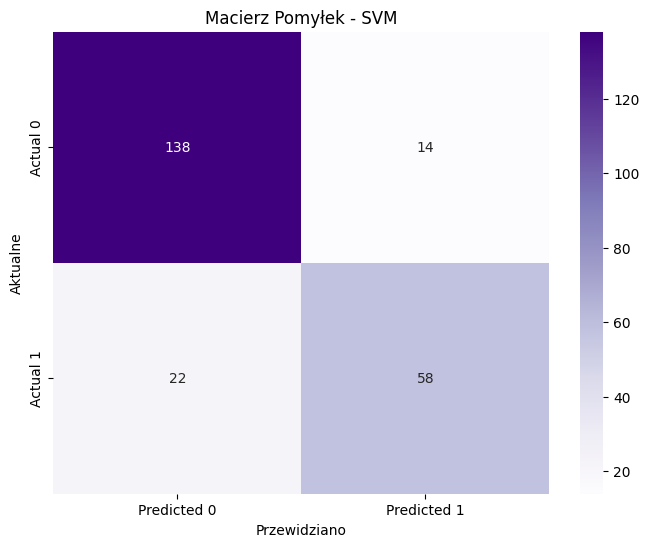

In [70]:
# Wygenerowanie heatmap dla macierzy pomyłek
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Purples', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Przewidziano')
plt.ylabel('Aktualne')
plt.title('Macierz Pomyłek - SVM')
plt.show()

# Perceptron

In [71]:
# Perceptron
perceptron_model = Perceptron(alpha=0.1, max_iter=1000, random_state=1, eta0=0.1, fit_intercept=False)
perceptron_model.fit(X_train, y_train)
y_pred_perceptron = perceptron_model.predict(X_test)

In [72]:
# Ocena modelu perceptronu
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
classification_rep_perceptron = classification_report(y_test, y_pred_perceptron)

# Wyświetlenie wyników dla perceptronu
print("Perceptron:")
print(f'Dokładność: {accuracy_perceptron}')
print(f'Macierz Pomyłek:\n{conf_matrix_perceptron}')
print(f'Raport Klasyfikacji:\n{classification_rep_perceptron}')

Perceptron:
Dokładność: 0.8146551724137931
Macierz Pomyłek:
[[148   4]
 [ 39  41]]
Raport Klasyfikacji:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       152
           1       0.91      0.51      0.66        80

    accuracy                           0.81       232
   macro avg       0.85      0.74      0.76       232
weighted avg       0.83      0.81      0.80       232



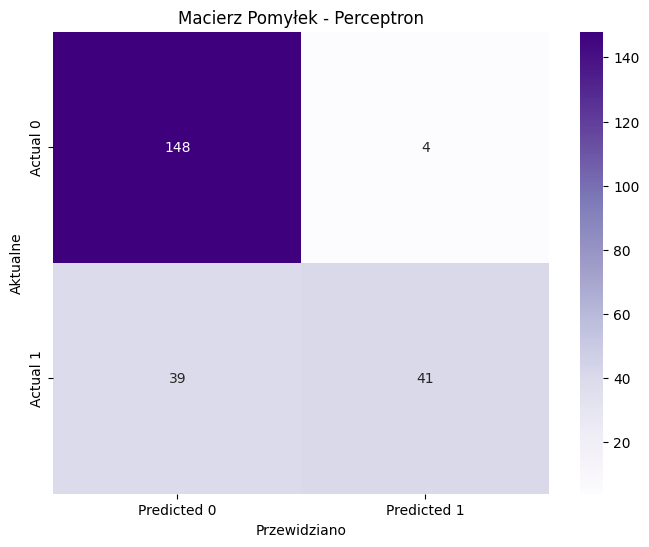

In [73]:
# Wyświetlenie wyników dla perceptronu
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_perceptron, annot=True, fmt='d', cmap='Purples', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Przewidziano')
plt.ylabel('Aktualne')
plt.title('Macierz Pomyłek - Perceptron')
plt.show()

# Wnioski na podstawie powyższych algorytmów

---

### **Regresja Logistyczna**:
- Doskonale zbalansowane rezultaty, uwzględniające równowagę między precyzją, recall a F1-score dla obu klas

### **Las Losowy**:
- Choć osiąga wysoką dokładność, F1-score dla klasy 1 jest nieco niższe niż w przypadku regresji logistycznej

### **Drzewo Decyzyjne**:
- Wyróżnia się dobrą precyzją i recall dla obu klas, co przekłada się na wyższe wartości F1-score niż w przypadku lasu losowego

### **KNN**:
- Mimo wysokiej dokładności, F1-score dla klasy 1 jest niższe w porównaniu do regresji logistycznej

### **Naive Bayes**:
- Najniższa dokładność w zestawieniu.
- Wyższy recall dla klasy 0, ale niższy dla klasy 1, co wpływa na niższe wartości F1-score

### **SVM**:
- Wysoka precyzja i recall dla obu klas, uzyskując wyższe wartości F1-score niż modele takie jak las losowy czy KNN

### **Perceptron**:
- Wysoka precyzja dla klasy 1, ale niższy recall, co wpływa na niższe wartości F1-score
- Dobre rezultaty dla klasy 0
